# Classification of IRIS using KNN

### Hanah Chang

## 1. Introduction 

In this project we are going to apply a KNN algorithm to classify three IRIS followers. The dataset is from https://www.kaggle.com/uciml/iris.

Examples of Key variables are : 

- sepalLength: sepal length 
- sepalWidth: sepal width 
- petalLength: petal length 
- petalWidth: petal width 

And our dependent variable is categorical data with three classes. 

- Iris Setosa
- Iris Versicolour
- Iris Virginica

## 2. Data & Libaray

The shape of a key'data' tells us there are 569 observations and 30 independent variables.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
iris_df = pd.read_csv('iris.csv')
print(iris_df.shape)
print(iris_df.tail(5))

(150, 5)
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica


## 3. Explanatory Analysis

From the right scatter, Setosa Iris seems to have larger sepal width and smaller sepal length compared to other two Iris. However, for Versicolor and Virginica it seems hard to separate these two based on Sepal length and Sepal Width. From the left scatter plot, Setosa seem very easy to separate  but again, it will be more challenging to find a decision boundary for dividing Versicolor and Virginica.  

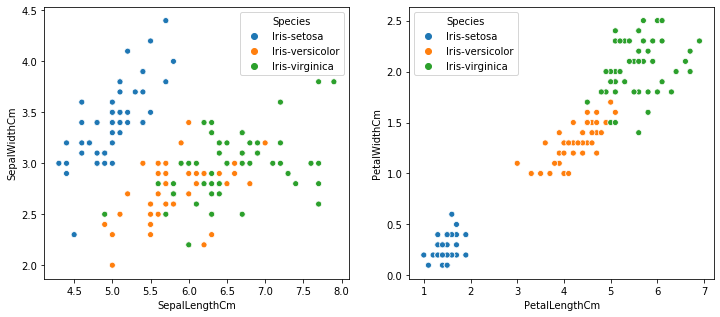

In [3]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot( x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = iris_df)

plt.subplot(1,2,2)
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = iris_df)

Next I created set of box plots using all four variables. We can see that Setosa does not overlap in most cases. 

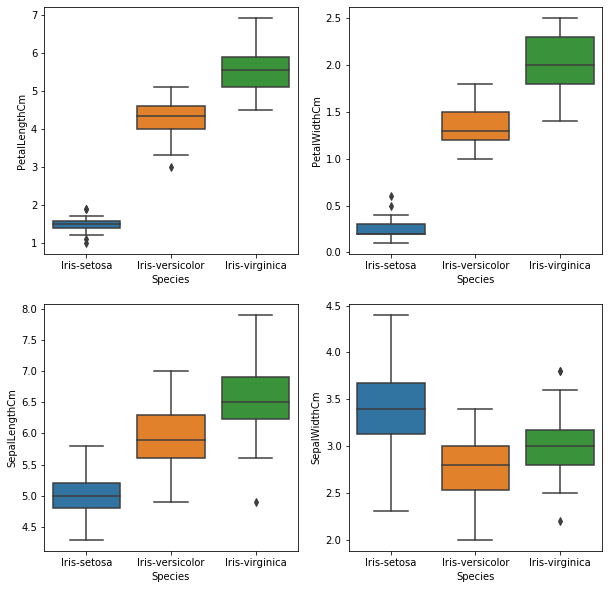

In [4]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=iris_df)

plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=iris_df)

plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris_df)

plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=iris_df)

For next explanatory analysis, we are going to visualize correlations between variables. There are high correlations between Sepal Length - Petal Width, Petal length - Sepallenth, Petal length - petal width and etc. Since we are not using linear regression the interdependency between variables is less likely to impact on our results.

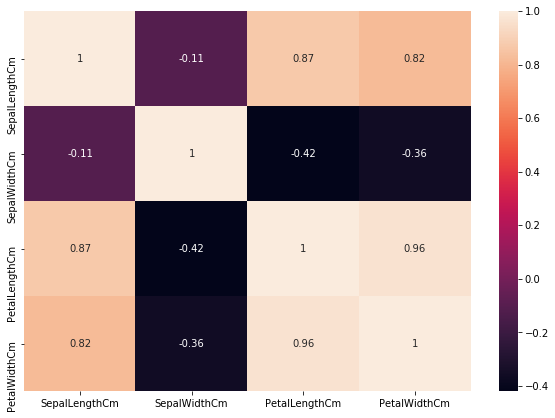

In [5]:
# Let's check the correlation between the variables 
plt.figure(figsize=(10,7)) 
sns.heatmap(iris_df.corr(),annot=True) 

## 4. KNN - Training

Random split our data into training and testing dataset using train_test_split from sklearn library

In [6]:
X = iris_df.drop(['Species'],axis=1)
y = iris_df['Species']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [18]:
print(X_train.head())
print(y_train.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
100            6.3           3.3            6.0           2.5
144            6.7           3.3            5.7           2.5
39             5.1           3.4            1.5           0.2
11             4.8           3.4            1.6           0.2
77             6.7           3.0            5.0           1.7
100     Iris-virginica
144     Iris-virginica
39         Iris-setosa
11         Iris-setosa
77     Iris-versicolor
Name: Species, dtype: object


## 4. KNN - Evaluating & Optimizing

We will train KNN with arguments metric = 'minkowski'and p = 2. This means we are calculating euclidean_distance between variables. 
Confusion matrix telss us the model correctly classified 42 (15 + 12+ 15), and only misclassified 3.

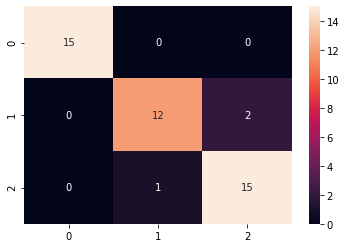

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d") 

Now we change n_neighbors to 5, meaning that the label of our testing data is labeled based on 5 closest training datapoints. The model is now improved by 1 datapoint. As we expected from explanatory analysis, Setosa is separated 100%.

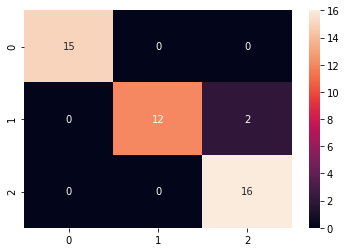

In [22]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d") 

In [23]:
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.89      1.00      0.94        16

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

